In [1]:
#Import  libraries
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import cv2


In [2]:
# Constants & ImageDataGenerator setup
TRAIN_DIR = r'D:\SIM\level 3\advanced multimedia\final project\CK+48\test'  #  TEST  
VAL_DIR = r'D:\SIM\level 3\advanced multimedia\final project\CK+48\train'  #  TRAIN 
TEST_DIR = r'D:\SIM\level 3\advanced multimedia\final project\CK+48\val'  # VAL
IMAGE_SIZE = 32  # Reduced image size
BATCH_SIZE = 16  # Reduced batch size

# Using ImageDataGenerator for loading & augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')


Found 981 images belonging to 7 classes.
Found 981 images belonging to 7 classes.


In [3]:
#Model Definition & Compilation
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #-2/2
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))  # Reduced to 512 neurons  #negative equal zero ,keep positive
model.add(Dropout(0.5))
#adjust probability dis
model.add(Dense(7, activation='softmax'))  # 7 classes for emotions
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
#  Training with Early Stopping
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=25,  # Increase the maximum number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator. n // BATCH_SIZE,
    callbacks=[early_stopping])


Epoch 1/25


61/61 [==============================] - 8s 105ms/step - loss: 1.8640 - accuracy: 0.2404 - val_loss: 1.8329 - val_accuracy: 0.2541
Epoch 2/25
61/61 [==============================] - 3s 48ms/step - loss: 1.8151 - accuracy: 0.2477 - val_loss: 1.6402 - val_accuracy: 0.2654
Epoch 3/25
61/61 [==============================] - 3s 49ms/step - loss: 1.4776 - accuracy: 0.3969 - val_loss: 1.3208 - val_accuracy: 0.4898
Epoch 4/25
61/61 [==============================] - 3s 47ms/step - loss: 1.3731 - accuracy: 0.4456 - val_loss: 1.2845 - val_accuracy: 0.4498
Epoch 5/25
61/61 [==============================] - 3s 49ms/step - loss: 1.3189 - accuracy: 0.4715 - val_loss: 1.1756 - val_accuracy: 0.6086
Epoch 6/25
61/61 [==============================] - 3s 48ms/step - loss: 1.2140 - accuracy: 0.5254 - val_loss: 0.9967 - val_accuracy: 0.6465
Epoch 7/25
61/61 [==============================] - 3s 47ms/step - loss: 1.1003 - accuracy: 0.5731 - val_loss: 0.9113 - val_accuracy: 0.6455
Epoch 8/25

In [5]:
# save what is in the cell above
model.save("./models/notebok_model_13.h5")

C:\Users\YOUSSEF\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
#load the saved model
from keras.models import load_model

# Load the model
loaded_model = load_model("./models/notebok_model_13.h5")


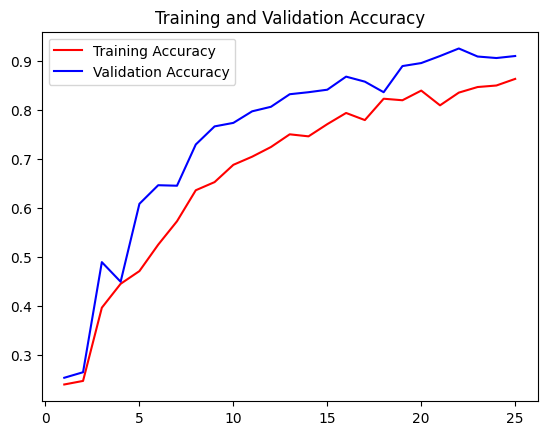

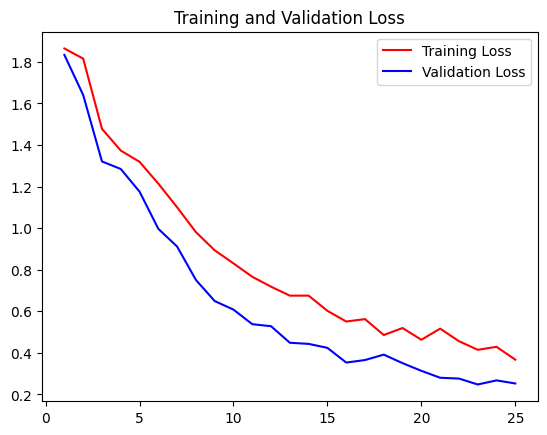

In [7]:


# Plot training & validation accuracy
#over fitting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [8]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

62/62 [==============================] - 1s 12ms/step - loss: 0.2537 - accuracy: 0.9093
Validation Loss: 0.2537, Validation Accuracy: 0.9093


In [9]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc}')

62/62 [==============================] - 1s 12ms/step - loss: 0.2537 - accuracy: 0.9093
Test Accuracy: 0.9092762470245361


In [10]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import numpy as np

# Path to the new image you want to predict
new_image_path = r"D:\SIM\level 3\advanced multimedia\final project\CK+48\test\3\fear\S011_003_00000013.png"

# Load and preprocess the image
img = image.load_img(new_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE), grayscale=True)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Use the loaded model for prediction
predictions = loaded_model.predict(img_array)

# Assuming your model has 7 output classes for emotions
emotion_labels = ['Anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

# Get the predicted emotion label
predicted_emotion_index = np.argmax(predictions)
predicted_emotion_label = emotion_labels[predicted_emotion_index]
print(f"Predicted Emotion: {predicted_emotion_label}")


C:\Users\YOUSSEF\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
Predicted Emotion: fear
